### notebook imports

In [264]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set()
%matplotlib inline

In [205]:
data = pd.read_csv('exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


In [206]:
data.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [208]:
data['gender'].value_counts()

female    55
male      45
Name: gender, dtype: int64

In [209]:
data['race/ethnicity'].value_counts()

group C    33
group D    27
group B    22
group E    12
group A     6
Name: race/ethnicity, dtype: int64

In [210]:
data['lunch'].value_counts()

standard        71
free/reduced    29
Name: lunch, dtype: int64

In [211]:
data['test preparation course'].value_counts()

none         65
completed    35
Name: test preparation course, dtype: int64

### Data Exploration using pandas

In [212]:
data.isnull().sum() # there is no null value in the columns

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

To analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot. The boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines at either side of the rectangle.

In [213]:
# copy the original dataset

df_replace_pe = data.copy()

In [214]:
df_replace_pe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


In [215]:
df_replace_pe = pd.get_dummies(df,prefix=['gender'],columns=['gender'])

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

In [216]:
# creating the average score out of math reading and writing

df_replace_pe['average_score']=(df_replace_pe['math score']+df_replace_pe['reading score']+df_replace_pe['writing score'])/3

In [217]:
df_replace_pe.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score
0,group E,associate's degree,standard,none,70,76,69,1,0,71.666667
1,group C,some college,standard,none,47,52,50,1,0,49.666667
2,group E,high school,standard,none,75,72,68,0,1,71.666667
3,group B,some college,free/reduced,completed,44,52,54,1,0,50.000000
4,group B,bachelor's degree,standard,completed,67,76,80,1,0,74.333333


In [218]:
data['parental level of education'].value_counts()

some college          25
associate's degree    21
some high school      18
high school           16
bachelor's degree     13
master's degree        7
Name: parental level of education, dtype: int64

In [219]:
# mapper for parental education level

map_parental_education={'parental level of education':{'some college':2,'associate\'s degree':2,
                                    'some high school':1,'high school':1,'bachelor\'s degree':2,
                                    'master\'s degree':3}}

In [220]:
# mapper for lunch 

map_lunch={'lunch':{'standard':2,'free/reduced':1}}

In [221]:
# mapper fot test preparation

map_test_prep = {'test preparation course':{'none':0,'completed':1}}

In [222]:
# replacing parental level of education with numerical value ,ordinal

df_replace_pe.replace(map_parental_education,inplace=True)
df_replace_pe.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score
0,group E,2,standard,none,70,76,69,1,0,71.666667
1,group C,2,standard,none,47,52,50,1,0,49.666667
2,group E,1,standard,none,75,72,68,0,1,71.666667
3,group B,2,free/reduced,completed,44,52,54,1,0,50.000000
4,group B,2,standard,completed,67,76,80,1,0,74.333333


In [223]:
# replacing lunch variable with numerical value , ordinal

df_replace_pe.replace(map_lunch,inplace=True)
df_replace_pe.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score
0,group E,2,2,none,70,76,69,1,0,71.666667
1,group C,2,2,none,47,52,50,1,0,49.666667
2,group E,1,2,none,75,72,68,0,1,71.666667
3,group B,2,1,completed,44,52,54,1,0,50.000000
4,group B,2,2,completed,67,76,80,1,0,74.333333


In [224]:
# replacing lunch variable with numerical value , ordinal 

df_replace_pe.replace(map_test_prep,inplace=True)
df_replace_pe.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score
0,group E,2,2,0,70,76,69,1,0,71.666667
1,group C,2,2,0,47,52,50,1,0,49.666667
2,group E,1,2,0,75,72,68,0,1,71.666667
3,group B,2,1,1,44,52,54,1,0,50.000000
4,group B,2,2,1,67,76,80,1,0,74.333333


In [225]:

df_replace_pe['parental level of education'].corr(df_replace_pe['average_score'])

0.16845426456797344

In [226]:
df_replace_race = df_replace_pe

In [227]:
df_replace_race.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score
0,group E,2,2,0,70,76,69,1,0,71.666667
1,group C,2,2,0,47,52,50,1,0,49.666667
2,group E,1,2,0,75,72,68,0,1,71.666667
3,group B,2,1,1,44,52,54,1,0,50.000000
4,group B,2,2,1,67,76,80,1,0,74.333333


In [228]:
# including ethnicity

df_replace_race = pd.get_dummies(df_replace_pe,prefix=['col'],columns=['race/ethnicity'])
df_replace_race.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,average_score,col_group A,col_group B,col_group C,col_group D,col_group E
0,2,2,0,70,76,69,1,0,71.666667,0,0,0,0,1
1,2,2,0,47,52,50,1,0,49.666667,0,0,1,0,0
2,1,2,0,75,72,68,0,1,71.666667,0,0,0,0,1
3,2,1,1,44,52,54,1,0,50.000000,0,1,0,0,0
4,2,2,1,67,76,80,1,0,74.333333,0,1,0,0,0


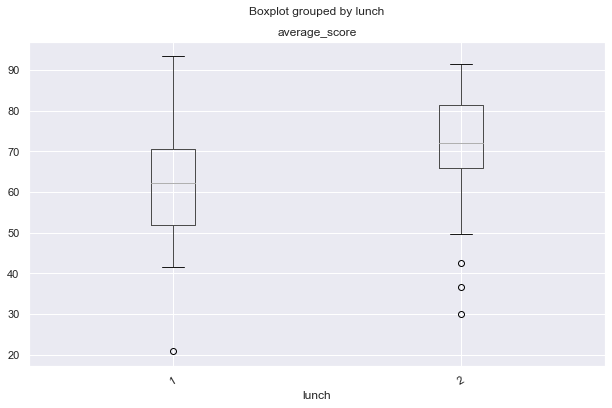

In [268]:
df_replace_pe.boxplot('average_score','lunch',rot=30,figsize=(10,6))
plt.show()

# shows who eats better lunch scores higher on average ,,,, not very sure though!!!

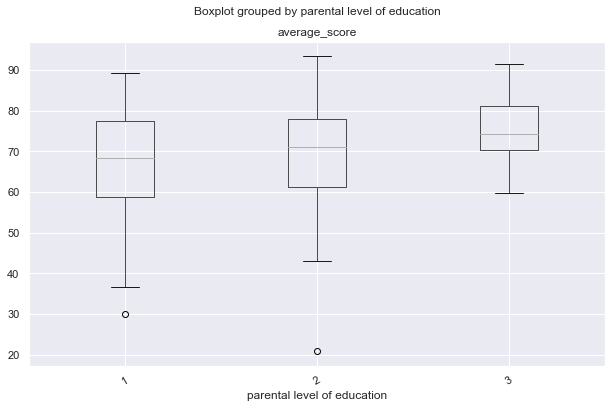

In [229]:
df_replace_pe.boxplot('average_score','parental level of education',rot=30,figsize=(10,6))
plt.show()

# shows average score of children whose parent is educated is slightly higher than the meadian score from others

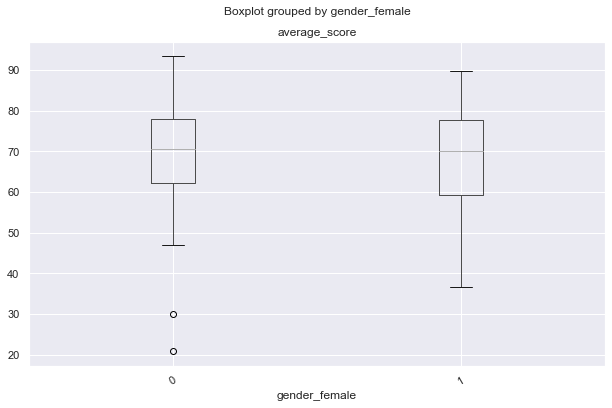

In [230]:
df_replace_pe.boxplot('average_score','gender_female',rot=30, figsize=(10,6))

# not significant

one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. 

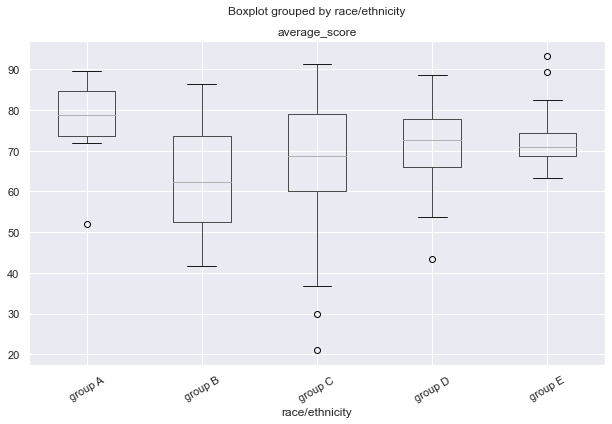

In [231]:
df_replace_pe.boxplot('average_score','race/ethnicity',rot=30,figsize=(10,6))
plt.show()


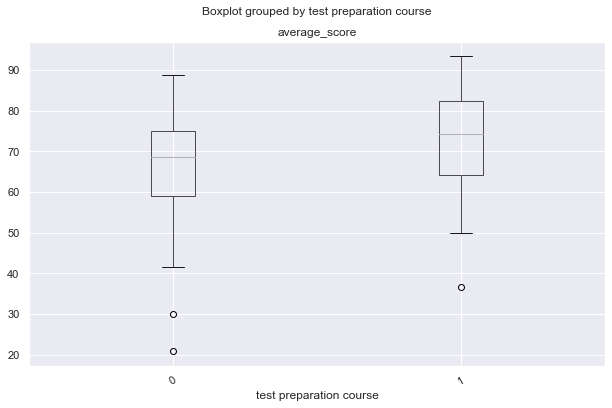

In [232]:
df_replace_pe.boxplot('average_score','test preparation course',rot=30,figsize=(10,6))
plt.show()

# those who has taken course preparation is likely to score higher than who has not

### Data Visualization

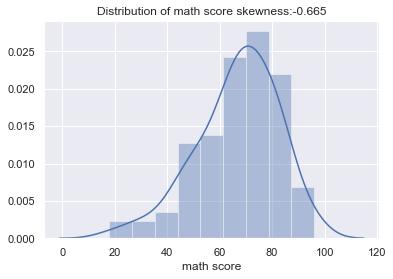

In [10]:
math_skew = np.round(data['math score'].skew(),3)
plt.title(f'Distribution of math score skewness:{math_skew}')
sns.distplot(data['math score'])
plt.show()

# data is negatively skewed

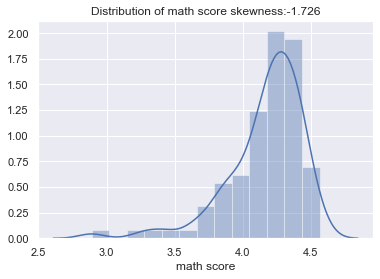

In [12]:
log_math_score = np.log(data['math score'])
math_skew = np.round(log_math_score.skew(),3)
plt.title(f'Distribution of math score skewness:{math_skew}')
sns.distplot(log_math_score)
plt.show()

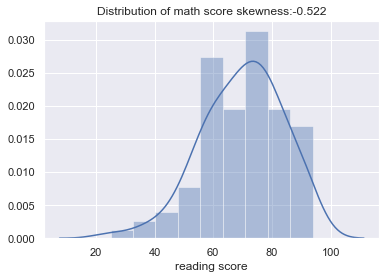

In [13]:
reading_skew = np.round(data['reading score'].skew(),3)
plt.title(f'Distribution of math score skewness:{reading_skew}')
sns.distplot(data['reading score'])
plt.show()


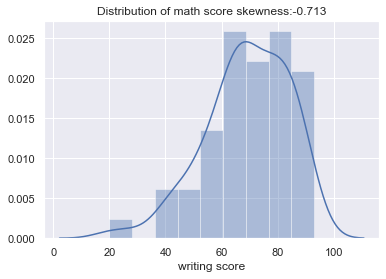

In [15]:
writing_skew = np.round(data['writing score'].skew(),3)
plt.title(f'Distribution of math score skewness:{writing_skew}')
sns.distplot(data['writing score'])
plt.show()


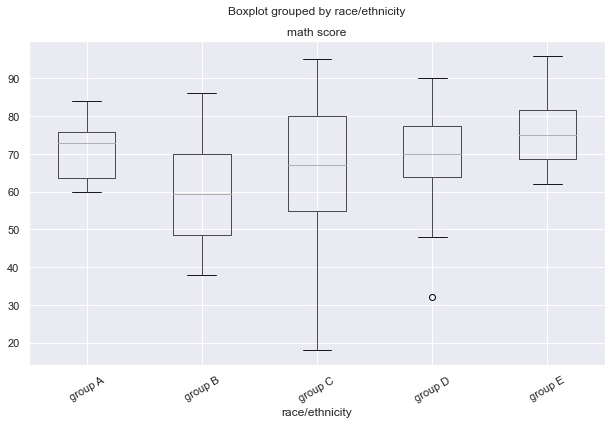

In [31]:
data.boxplot('math score','race/ethnicity',rot=30,figsize=(10,6))
plt.show()


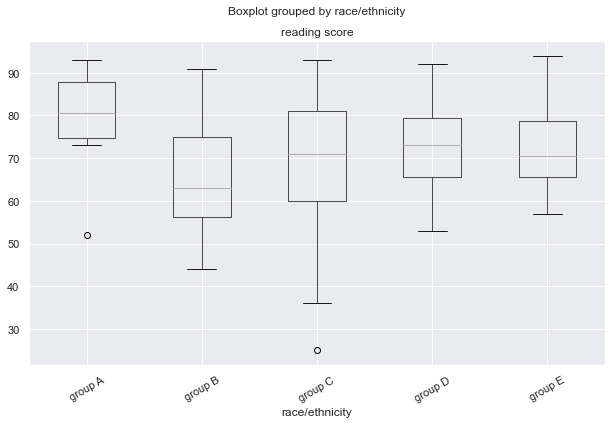

In [32]:
data.boxplot('reading score','race/ethnicity',rot=30,figsize=(10,6))
plt.show()

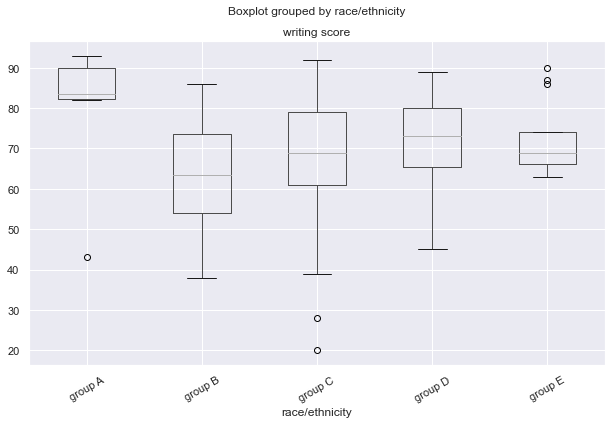

In [33]:
data.boxplot('writing score','race/ethnicity',rot=30,figsize=(10,6))
plt.show()

In [34]:
### my insight: group A could be people from north american background
## group E could be people form asian background

-1.79

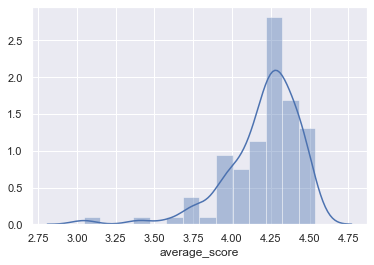

In [127]:
log_score = np.log(df_replace_pe['average_score'])
skew = np.round(log_score.skew(),2)
sns.distplot(log_score)
skew

-0.75

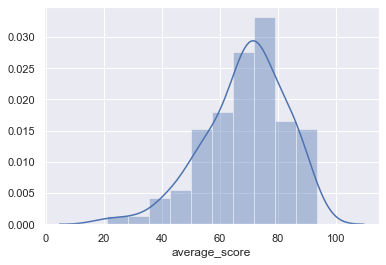

In [128]:
skew = np.round(df_replace_pe['average_score'].skew(),2)
sns.distplot(df_replace_pe['average_score'])
skew

In [166]:
df_replace_race.columns

Index(['parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'average_score', 'col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E'],
      dtype='object')

In [123]:
df_replace_pe.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'gender_female', 'gender_male', 'average_score'],
      dtype='object')

In [234]:

df_replace_race[['average_score']] = scale(df_replace_race[['average_score']].astype('float64'))
df_replace_race[['math score']] = scale(df_replace_race[['math score']].astype('float64'))
df_replace_race[['reading score']] = scale(df_replace_race[['reading score']].astype('float64'))
df_replace_race[['writing score']] = scale(df_replace_race[['writing score']].astype('float64'))

### Train test split

In [235]:
# let's determine writing score

X = df_replace_pe[['parental level of education', 'lunch','test preparation course','math score','reading score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

## Multivariable regression

In [236]:
# Model 1

regr = LinearRegression()
regr.fit(X_train,y_train)

# calculating r_squred value

print('r-squared for training data: ', regr.score(X_train,y_train))
print('r-squared for test data: ', regr.score(X_test,y_test))

print('intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef'])


r-squared for training data:  0.9370278636984172
r-squared for test data:  0.9065521788899756
intercept:  -5.274180486132863


,coef
parental level of education,1.186050
lunch,0.565904
test preparation course,4.473588
math score,0.115062
reading score,0.890719


In [237]:
## model 2

X = df_replace_race[['parental level of education', 'lunch','test preparation course','math score','reading score','col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [238]:
regr = LinearRegression()
regr.fit(X_train,y_train)

# calculating r_squred value

print('r-squared for training data: ', regr.score(X_train,y_train))
print('r-squared for test data: ', regr.score(X_test,y_test))

print('intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef'])


r-squared for training data:  0.9424151458763038
r-squared for test data:  0.894729186593366
intercept:  65.78286285229146


,coef
parental level of education,1.114354
lunch,0.268754
test preparation course,4.288804
math score,2.176119
reading score,11.707005
col_group A,2.470258
col_group B,-0.391384
col_group C,-1.259616
col_group D,0.722268
col_group E,-1.541526


## P-values and evaluating coefficients

In [239]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     127.3
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           9.04e-40
Time:                        15:37:04   Log-Likelihood:                -213.88
No. Observations:                  80   AIC:                             447.8
Df Residuals:                      70   BIC:                             471.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          54.8191      2.119     25.870      0.000      50.593      59.045
parental level of education     1.1144      0.727      1.533      0.130      -0.336       2.564
lunch                           0.2688      1.089      0.247      0.806      -1.904       2.442
test preparation course         4.2888      0.985      4.353      0.000       2.324       6.254
math score                      2.1761      0.800      2.719      0.008       0.580       3.772
reading score                  11.7070      0.748     15.652      0.000      10.215      13.199
col_group A                    13.4341      1.655      8.118      0.000      10.134      16.735
col_group B                    10.5724      0.920     11.489      0.000       8.737      12.408
col_group C                     9.7042      0.871     11.140      0.000       7.967      11.442
col_group D                    11.6861      0.897     13.030      0.000       9.897      13.475
col_group E                     9.4223      1.076      8.760      0.000       7.277      11.568
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                1.013
Skew:                           0.165   Prob(JB):                        0.603
Kurtosis:                       2.558   Cond. No.                     2.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

note: p-value for parental level of education is insignificant

In [240]:
# variance inflation factor to check for multicollinearity

for i in range(len(X_incl_const.columns)):
    print(f'{X_incl_const.columns[i]} {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')

const 0.0
parental level of education 1.0514204376163399
lunch 1.384205549531936
test preparation course 1.2360750535552503
math score 3.338717832692972
reading score 3.03624776054864
col_group A inf
col_group B inf
col_group C inf
col_group D inf
col_group E inf


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [241]:
## model 2

X = df_replace_race[['test preparation course','math score','reading score','col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

regr = LinearRegression()
regr.fit(X_train,y_train)

# calculating r_squred value

print('r-squared for training data: ', regr.score(X_train,y_train))
print('r-squared for test data: ', regr.score(X_test,y_test))

print('intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef'])

r-squared for training data:  0.9404815083145798
r-squared for test data:  0.8940652781249139
intercept:  68.23183087356293


,coef
test preparation course,4.199653
math score,2.150758
reading score,11.806522
col_group A,2.717885
col_group B,-0.562319
col_group C,-1.268752
col_group D,0.672736
col_group E,-1.559549


### Model simplification and BIC metric

In [242]:
# Model 2: including parental_level_of_education

X = df_replace_race[['parental level of education', 'lunch','test preparation course','math score','reading score','col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_with_pe= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9424151458763039
bic for model- 1 471.5811957312498
mean squared error 14.050611859094868


In [244]:
# Model 3: excluding parental_level_of_edication

X = df_replace_race[['lunch','test preparation course','math score','reading score','col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E']]
y = df_replace_pe['average_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_wo_pe= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

# variance inflation factor to check for multicollinearity

for i in range(len(X_incl_const.columns)):
    print(f'{X_incl_const.columns[i]} {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')

r-squared for model-1 0.992274840851824
bic for model- 1 294.06215386169345
mean squared error 1.5908502442105041
const 0.0
lunch 1.3573617956145103
test preparation course 1.2325517737595746
math score 3.3361748876013384
reading score 3.0134618305579943
col_group A inf
col_group B inf
col_group C inf
col_group D inf
col_group E inf


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [245]:
# Model 4 : 

X = df_replace_race[['lunch','test preparation course','math score','reading score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9347937437598153
bic for model- 1 459.6147293618862
mean squared error 14.849540278380367


In [246]:
# Model 5 : excluding parental_level_of_edication and ethnicity but include gender

X = df_replace_race[['lunch','test preparation course','gender_male','gender_female','reading score','math score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9469198516830823
bic for model- 1 447.53656277588095
mean squared error 12.251391374814443


In [247]:
# Model 6 : excluding parental_level_of_edication,lunch and ethnicity 

X = df_replace_race[['test preparation course','gender_male','gender_female','reading score','math score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9469042787888468
bic for model- 1 443.1780034611041
mean squared error 12.09158593357149


In [249]:
# Model 7 : excluding parental_level_of_edication, gender

X = df_replace_race[['lunch','test preparation course','reading score','math score','col_group A', 'col_group B',
       'col_group C', 'col_group D', 'col_group E']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9404824354931781
bic for model- 1 469.84012004859085
mean squared error 14.317652197894509


In [250]:
# Model4 : excluding parental_level_of_edication and ethnicity , gender

X = df_replace_race[['test preparation course','reading score','math score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9347141904950896
bic for model- 1 455.3302452395508
mean squared error 14.672030022240794


### AFTER MODEL COMPARISION

Out of all the models, model 6 has relatively low BIC and lower mse compared to other models and also the r-squared is pretty high 

In [259]:
# Model 6 : excluding parental_level_of_edication,lunch and ethnicity 

X = df_replace_race[['test preparation course','gender_male','gender_female','reading score','math score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.9469042787888468
bic for model- 1 443.1780034611041
mean squared error 12.09158593357149


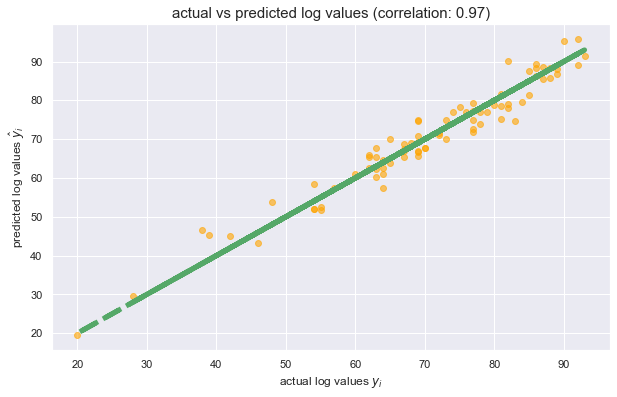

In [260]:
corr = round(y_train.corr(result.fittedvalues),2) # fitted and actual values are quite similar
plt.figure(figsize=(10,6))
plt.scatter(y_train,result.fittedvalues,c='orange', alpha=0.6)
plt.title(f'actual vs predicted log values (correlation: {corr})', fontsize=15)
plt.xlabel('actual log values $y_i$',fontsize=12)
plt.ylabel('predicted log values $\haty_i$',fontsize=12)
plt.plot(y_train,y_train,'g--',lw=5 )
plt.show()

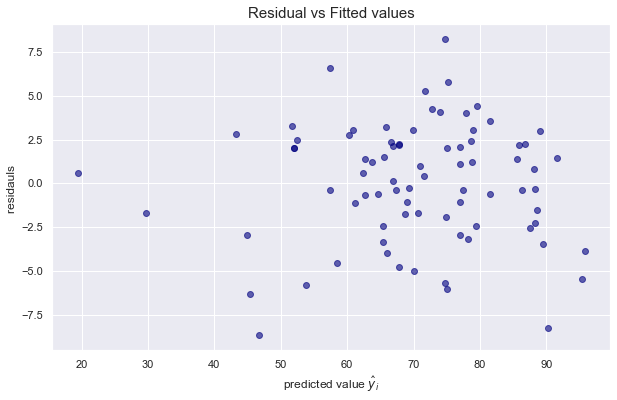

In [261]:
# predicted value vs residual

plt.figure(figsize=(10,6))
plt.scatter(result.fittedvalues,result.resid,c='navy', alpha=0.6)
plt.title('Residual vs Fitted values', fontsize=15)
plt.xlabel('predicted value $\haty_i$',fontsize=12)
plt.ylabel('residauls ',fontsize=12)
plt.show()

# the graph for residuals looks random

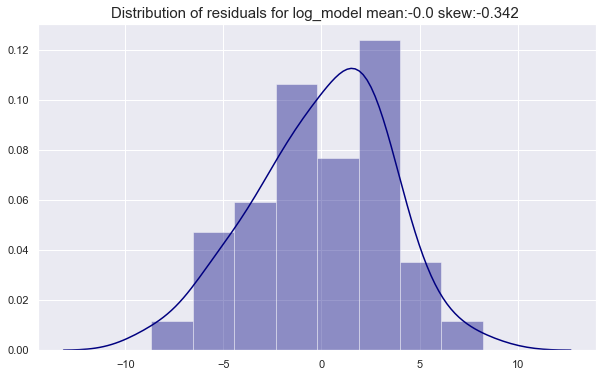

In [262]:
### Distriution of residuals - checking for normality

resid_mean = round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(result.resid, color='navy')
plt.title(f'Distribution of residuals for log_model mean:{resid_mean} skew:{resid_skew} ', fontsize=15)
plt.show()


In [266]:

X = df_replace_race[['test preparation course','gender_male','gender_female','reading score','math score']]
y = df_replace_pe['writing score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

print('training r-score', regr.score(X_train,y_train))
print('testing r-score ', r2_score(y_test,y_pred))
print('mean squared error:', mean_squared_error(y_test,y_pred))
print('mean absoulte error: ', mean_absolute_error(y_test,y_pred))



training r-score 0.9469042787888468
testing r-score  0.9235945874824454
mean squared error: 16.375781051356185
mean absoulte error:  2.976443492131625
